## Generalised linear model for house price prediction
Use a generalised linear model with a poisson distribution for house price prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load house price data
data_path = '../../data/house_prices/'
trainset = pd.read_csv(data_path + 'train.csv', low_memory=False)

print('No. of training samples: ', len(trainset))

# Get list of numerical features to use
num_features = []
with open('../../data/house_prices/num_features_0.txt', 'r') as fp:
    for item in fp:
        num_features.append(item)

num_features = [x.strip('\n') for x in num_features]
num_features_id = num_features.copy()
num_features_id.append('Id')

# Remove nans in training set
trainset_dropna = trainset[num_features_id].dropna()
print('No. of houses remaining in training set: ', len(trainset_dropna))

# Split data into features and label (price)
Xtrain = trainset_dropna[num_features]
ytrain = trainset.iloc[trainset_dropna.index.values]['SalePrice']

print('No. of features: ', len(Xtrain.columns))

No. of training samples:  1460
No. of houses remaining in training set:  1121
No. of features:  30


In [12]:
# Use scikit PoissonRegressor (GLM)
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)

# Fit GLM
glm = PoissonRegressor(max_iter=1000).fit(X=Xtrain_scaled, y=ytrain.values)

In [13]:
from sklearn.metrics import r2_score

# Use linear regression model to make prediction
ytrain_pred = glm.predict(Xtrain_scaled)

# Get metrics for training set
r2 = r2_score(ytrain, ytrain_pred)
print('R**2 score: ', r2)

R**2 score:  0.8205210636337743


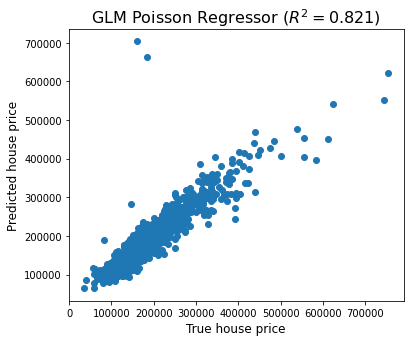

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(ytrain, ytrain_pred)
plt.xlabel('True house price', fontsize=12)
plt.ylabel('Predicted house price', fontsize=12)
plt.title('GLM Poisson Regressor ($R^2={:.3f}$)'.format(r2), fontsize=16)

plt.savefig('house_prices_glm_poisson.png', format='png', dpi=100, bbox_inches='tight', facecolor='w')
plt.show()